<a href="https://colab.research.google.com/github/Nur9702/Postgresql/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning.

# Classification

### Mijozning noroziligini (customer churn) aniqlash

Biznesda eng ko'p uchraydigan muammolardan biri. Mijozning kayfiyatini aniqlash.

Agar biznes egasi mijoz qaytmasligini, maxsulot yoki xizmatdan qayta foydanalmasligini oldindan bashorat qila olsa, mijozni ushlab qolish uchun, uning fikrini o'zgartirish uchun harakat qilishi mumkin.

Ushbu amaliyotda biz online do'kon xaridorlari ma'lumotlarini tahlil qilish orqali mijozning qolish-qolmasligini bashorat qilamiz.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

In [2]:
url="https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true"

df = pd.read_excel(url, sheet_name="E Comm")

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
df.shape

(5630, 20)

In [4]:
pip install xlrd==2.0.1

In [5]:
description = pd.read_excel(url, sheet_name='Data Dict', header=1, usecols=[1,2,3])
description

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [7]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [8]:
df.sample(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2534,52535,0,6.0,Mobile Phone,3,8.0,Credit Card,Male,3.0,3,Laptop & Accessory,1,Married,2,0,14.0,1.0,1.0,4.0,155.05
5425,55426,0,7.0,Computer,1,11.0,COD,Male,3.0,4,Laptop & Accessory,4,Married,7,0,16.0,1.0,2.0,8.0,155.55
1038,51039,0,10.0,Phone,1,16.0,Credit Card,Female,3.0,3,Mobile Phone,4,Married,2,0,11.0,1.0,7.0,7.0,139.36
5273,55274,0,6.0,Computer,1,8.0,COD,Male,4.0,4,Laptop & Accessory,5,Married,6,0,15.0,1.0,2.0,3.0,165.87
5135,55136,1,19.0,Mobile Phone,3,20.0,E wallet,Male,3.0,2,Grocery,3,Single,8,1,18.0,NaN,4.0,9.0,261.95
5314,55315,0,21.0,Mobile Phone,2,33.0,Debit Card,Female,4.0,4,Others,3,Married,5,0,NaN,2.0,2.0,1.0,321.58
2987,52988,0,9.0,Mobile Phone,3,23.0,E wallet,Male,4.0,4,Fashion,4,Divorced,2,0,16.0,4.0,7.0,10.0,205.20
235,50236,0,30.0,Mobile Phone,1,6.0,Credit Card,Male,2.0,3,Laptop & Accessory,3,Divorced,3,0,11.0,1.0,1.0,2.0,167.55
1415,51416,0,30.0,Computer,3,6.0,Debit Card,Female,2.0,4,Laptop & Accessory,3,Single,8,0,11.0,1.0,1.0,3.0,154.73
1131,51132,0,11.0,Computer,1,NaN,CC,Female,3.0,4,Mobile,4,Married,5,0,14.0,0.0,1.0,5.0,124.68


In [9]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [10]:
df['Churn'].value_counts()

,count
Churn,
0,4682
1,948


4682 ta mijoz qaytib harid qilgan
948 ta miz qaytmagan

In [11]:
df['Churn'].value_counts()/len(df)*100

,count
Churn,
0,83.161634
1,16.838366


In [12]:
churn_rate =df['Churn'].value_counts()/len(df)*100

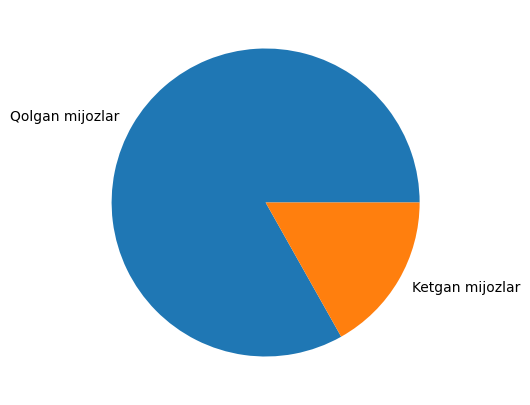

In [13]:
plt.figure(figsize=(5,5))
plt.pie(churn_rate, labels=['Qolgan mijozlar', 'Ketgan mijozlar'])
plt.show()

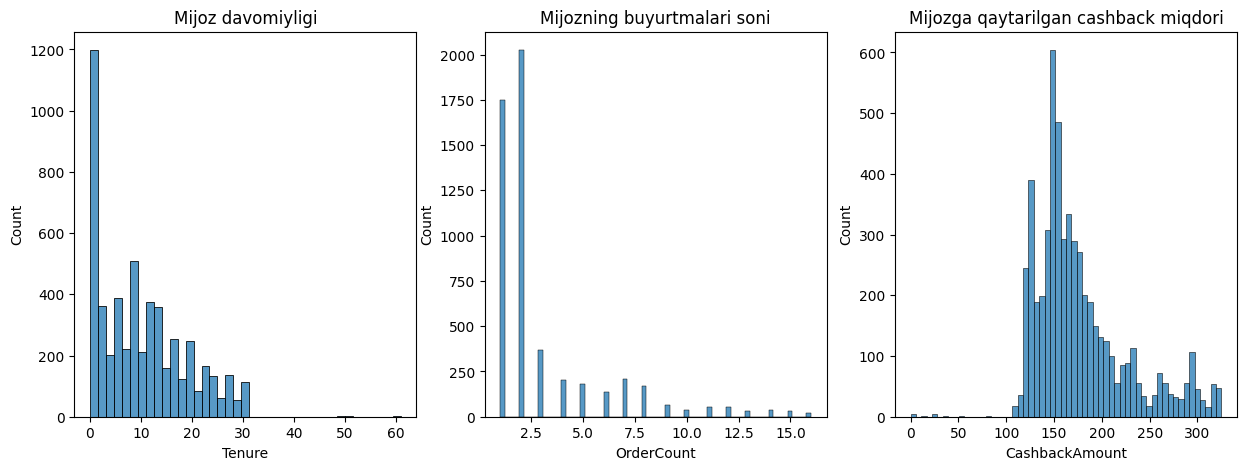

In [14]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

# Tenure
sns.histplot(x="Tenure", data=df, ax=axes[0])
axes[0].set_title("Mijoz davomiyligi")

#OrderCount
sns.histplot(x="OrderCount", data=df, ax=axes[1])
axes[1].set_title("Mijozning buyurtmalari soni")

# Cashback
sns.histplot(x="CashbackAmount", data=df, ax=axes[2])
axes[2].set_title("Mijozga qaytarilgan cashback miqdori")

plt.show()

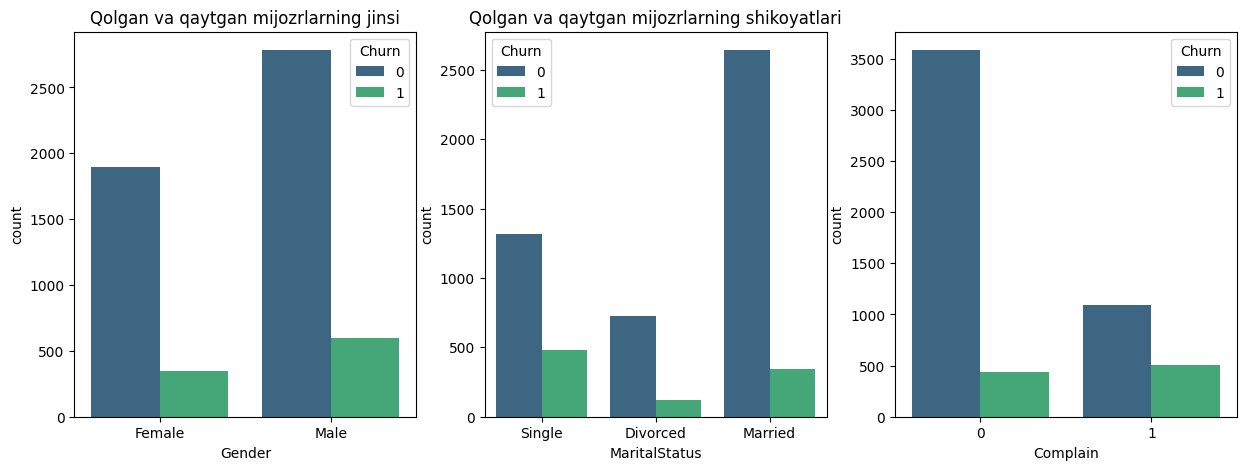

In [15]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x='Gender', hue='Churn', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Qolgan va qaytgan mijozrlarning jinsi")

sns.countplot(x='MaritalStatus', hue='Churn', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Qolgan va qaytgan mijozrlarning oilaviy xolati")

sns.countplot(x='Complain', hue='Churn', palette='viridis', data=df, ax=axes[2])
axes[1].set_title("Qolgan va qaytgan mijozrlarning shikoyatlari")

plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder # The LabelEncoder is in the preprocessing submodule
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'].values)
df['MaritalStatus'] = encoder.fit_transform(df['MaritalStatus'].values)
df['PreferedOrderCat'] = encoder.fit_transform(df['PreferedOrderCat'].values)
df['PreferredLoginDevice'] = encoder.fit_transform(df['PreferredLoginDevice'].values)
df['PreferredPaymentMode'] = encoder.fit_transform(df['PreferredPaymentMode'].values)

df.sample(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5446,55447,0,14.0,1,1,9.0,4,0,4.0,4,4,5,1,6,0,18.0,2.0,2.0,3.0,158.77
2655,52656,0,30.0,0,1,21.0,4,1,2.0,3,1,3,1,3,1,14.0,2.0,NaN,2.0,257.87
2230,52231,0,0.0,2,3,16.0,4,1,2.0,3,2,1,2,1,0,14.0,1.0,1.0,1.0,149.50
426,50427,0,12.0,1,2,9.0,6,0,2.0,2,2,4,0,10,0,15.0,3.0,3.0,6.0,163.89
2486,52487,0,NaN,2,1,13.0,0,1,2.0,4,3,4,1,2,0,12.0,1.0,1.0,1.0,121.41
3124,53125,0,5.0,1,1,16.0,4,1,3.0,4,0,4,1,3,0,26.0,2.0,2.0,9.0,231.48
1295,51296,0,14.0,2,1,6.0,4,1,NaN,3,3,1,1,4,0,22.0,0.0,1.0,0.0,127.82
4040,54041,0,1.0,1,3,9.0,3,0,3.0,2,2,3,2,2,0,15.0,1.0,2.0,8.0,190.00
3333,53334,0,16.0,1,1,10.0,4,0,4.0,2,2,2,0,4,1,14.0,1.0,2.0,4.0,177.31
2403,52404,1,0.0,2,3,30.0,3,0,2.0,4,2,4,2,1,1,23.0,4.0,10.0,10.0,145.99


In [17]:
#['Gender'] = df['Gender'].replace("M",1)


In [32]:
df.corrwith(df['Churn']).abs().sort_values(ascending=False)

,0
Churn,1.000000
Tenure,0.349408
Complain,0.250188
DaySinceLastOrder,0.160757
CashbackAmount,0.154118
MaritalStatus,0.140316
PreferedOrderCat,0.118922
NumberOfDeviceRegistered,0.107939
SatisfactionScore,0.105481
CityTier,0.084703


In [33]:
#df dagi mavjud bo'lmagan qiymatlar soni
print(f"Mavjud bo'lmagan qiymatlar soni: {df.isnull().sum().sum()}")
#mavjud bo'lmagan qatorlar soni
missing_rows = df[df.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")
#qatorlar nisbati
print(f"Mavjud bo'lmagan qatorlar %: {np.round(missing_rows/len(df)*100)}%")

Mavjud bo'lmagan qiymatlar soni: 1856
Mavjud bo'lmagan qatorlar soni: 1856
Mavjud bo'lmagan qatorlar %: 33.0%


In [20]:
data = df[['Churn','Tenure','Complain','DaySinceLastOrder','CashbackAmount','MaritalStatus','Gender']]

In [21]:
print(f"Mavjud bo'lmagan qiymatlar soni: {data.isnull().sum().sum()}")
#mavjud bo'lmagan qatorlar soni
missing_rows = data[data.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")
#qatorlar nisbati
print(f"Mavjud bo'lmagan qatorlar %: {np.round(missing_rows/len(data)*100)}%")


Mavjud bo'lmagan qiymatlar soni: 571
Mavjud bo'lmagan qatorlar soni: 571
Mavjud bo'lmagan qatorlar %: 10.0%


In [22]:
data = data.dropna()
data.shape

(5059, 7)

In [23]:
data['Churn'].value_counts()/len(data)

,count
Churn,
0,0.839296
1,0.160704


#Matnli ustunlarni songa o'tkazzamiz

In [34]:
# Matnli ustunlarni songa o'tkazamiz
encoded = pd.get_dummies(data)
encoded.head()

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,MaritalStatus,Gender
0,1,4.0,1,5.0,159.93,2,0
3,1,0.0,0,3.0,134.07,2,1
4,1,0.0,0,3.0,129.60,2,1
5,1,0.0,1,7.0,139.19,2,0
8,1,13.0,1,2.0,126.83,0,1


In [35]:
X = encoded.drop("Churn", axis=1)
y = encoded['Churn']

In [36]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       849
           1       0.71      0.37      0.48       163

    accuracy                           0.87      1012
   macro avg       0.80      0.67      0.71      1012
weighted avg       0.86      0.87      0.86      1012

Model aniqligi: 0.8735177865612648


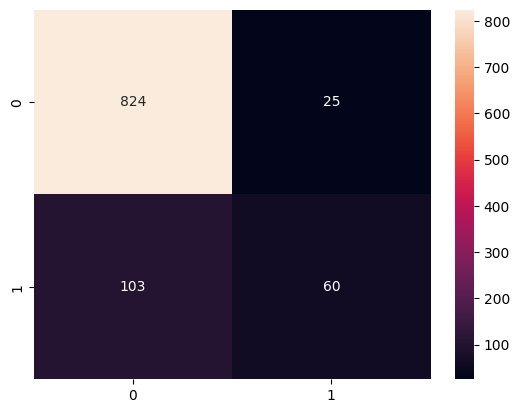

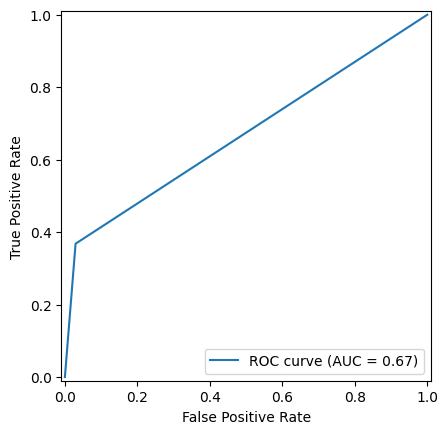

In [38]:
# Modelni yaratamiz (training)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

#Support Vector Machine

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       849
           1       0.70      0.37      0.48       163

    accuracy                           0.87      1012
   macro avg       0.79      0.67      0.70      1012
weighted avg       0.86      0.87      0.86      1012

Model aniqligi: 0.8725296442687747


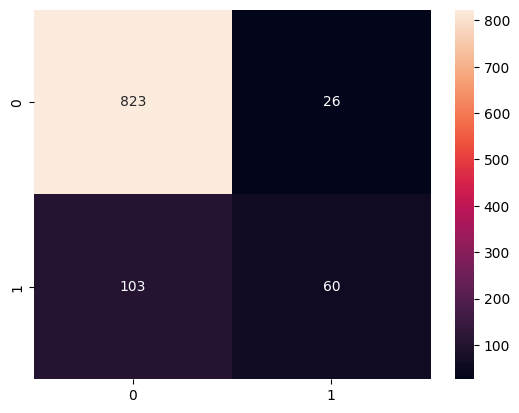

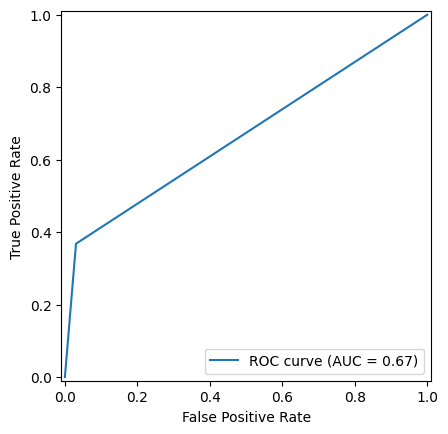

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Modelni yaratamiz (training)
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

#Decision Tree

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       849
           1       0.84      0.90      0.87       163

    accuracy                           0.96      1012
   macro avg       0.91      0.93      0.92      1012
weighted avg       0.96      0.96      0.96      1012

Model aniqligi: 0.9565217391304348


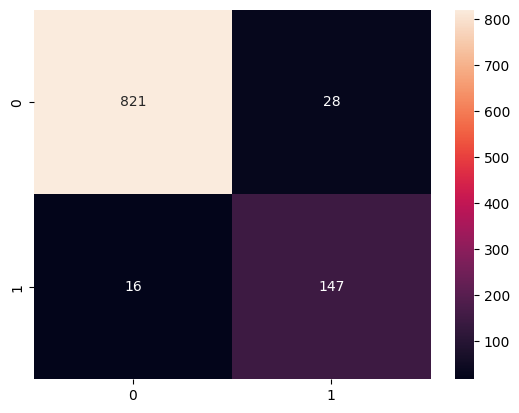

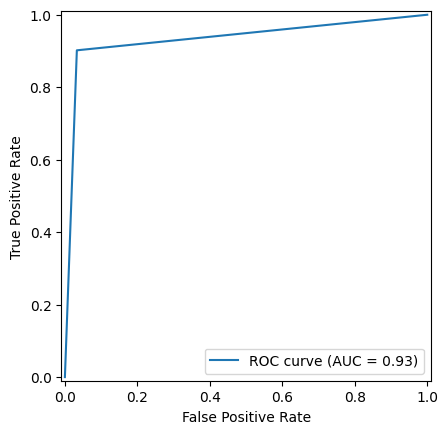

In [49]:
# Modelni yaratamiz (training)
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

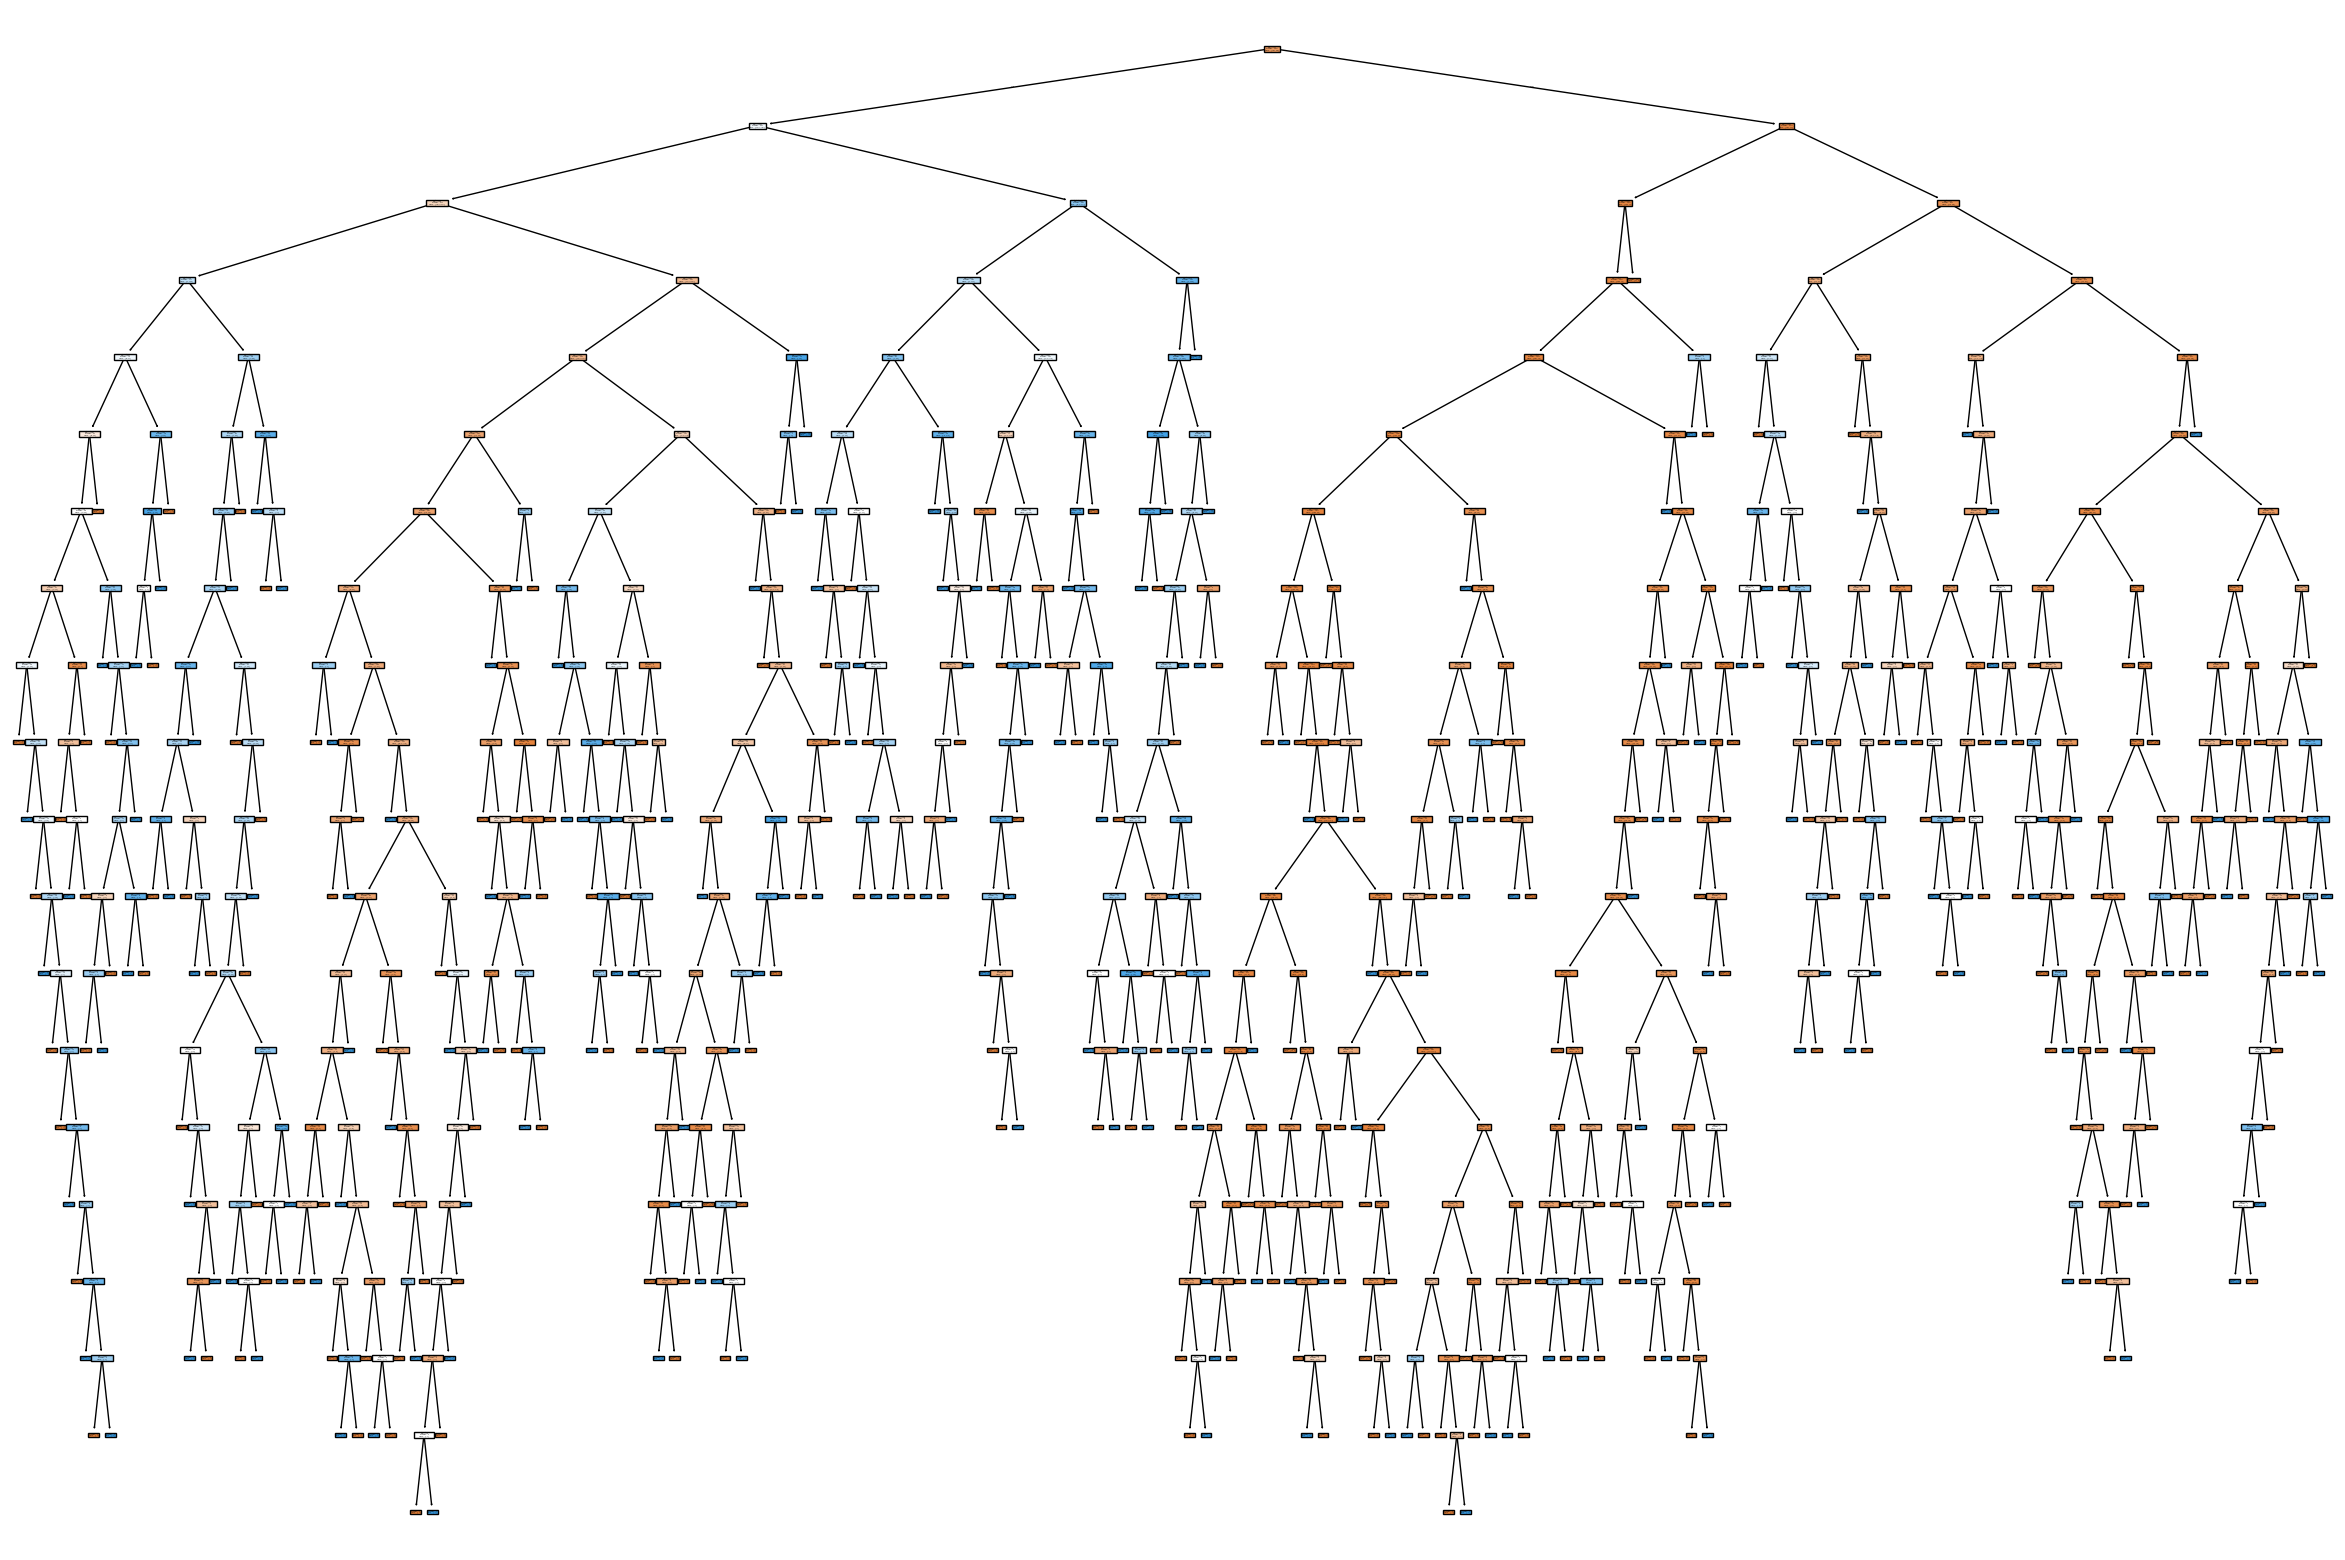

In [50]:

cols = encoded.drop('Churn', axis=1).columns

plt.figure(figsize=(30,20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

#Random State

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       849
           1       0.88      0.80      0.84       163

    accuracy                           0.95      1012
   macro avg       0.92      0.89      0.91      1012
weighted avg       0.95      0.95      0.95      1012

Model aniqligi: 0.950592885375494


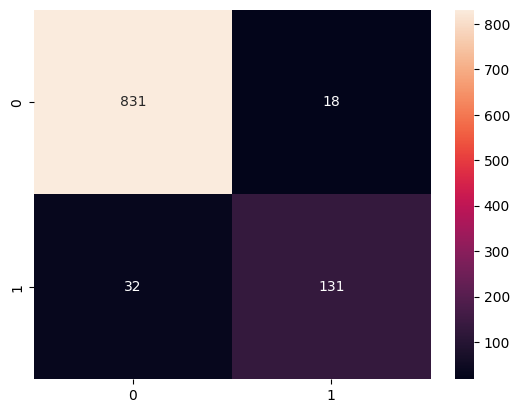

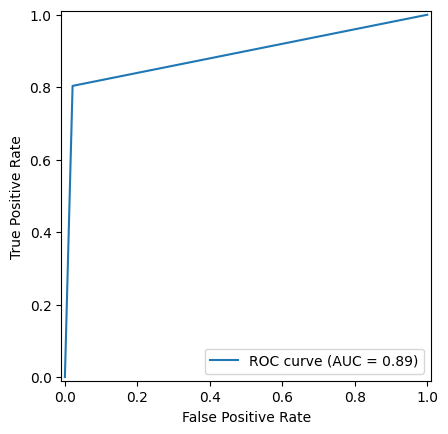

In [51]:
# Modelni yaratamiz (training)
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

#XGBoost

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       849
           1       0.87      0.75      0.81       163

    accuracy                           0.94      1012
   macro avg       0.91      0.87      0.89      1012
weighted avg       0.94      0.94      0.94      1012

Model aniqligi: 0.941699604743083


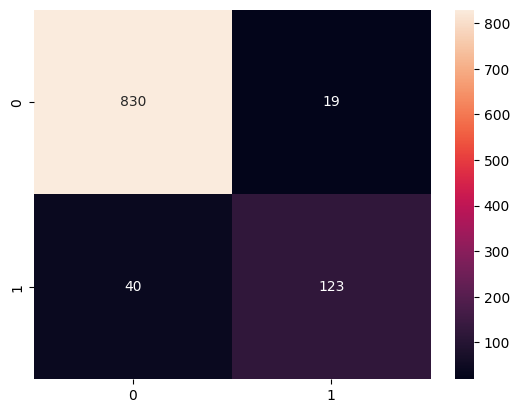

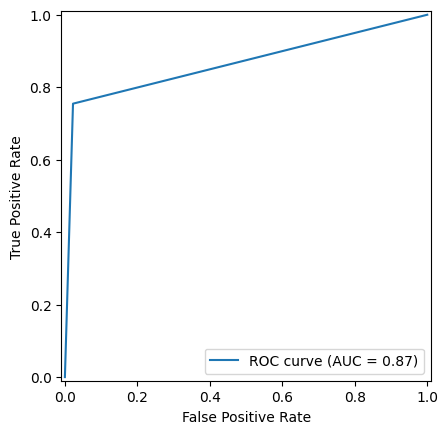

In [52]:
# Modelni yaratamiz (training)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()